### 1. Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Import Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import seaborn as sns

### 3. Dataset Path and Parameters

In [14]:
data_dir = "/content/drive/MyDrive/Autism Images Augmented"
IMG_SIZE = 128
BATCH_SIZE = 16

### 4. Load Dataset

In [15]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

Found 2564 files belonging to 2 classes.
Using 2052 files for training.
Found 2564 files belonging to 2 classes.
Using 512 files for validation.


### 5. Preprocessing

In [16]:
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_dataset = val_dataset.map(lambda x, y: (preprocess_input(x), y))

### 6. Load EfficientNetV2-Small Base

In [17]:
base_model = EfficientNetV2S(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False   # Freeze base

### 7. Build Final Model

In [18]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

### 8. Compile Model

In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

### 9. Early Stopping

In [20]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

### 10. Train Model

In [21]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.6161 - loss: 0.6429 - val_accuracy: 0.7656 - val_loss: 0.5084
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.7479 - loss: 0.5169 - val_accuracy: 0.7812 - val_loss: 0.4747
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.7682 - loss: 0.4967 - val_accuracy: 0.7832 - val_loss: 0.4555
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.7534 - loss: 0.4816 - val_accuracy: 0.7832 - val_loss: 0.4408
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.7994 - loss: 0.4506 - val_accuracy: 0.7988 - val_loss: 0.4292
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8029 - loss: 0.4390 - val_accuracy: 0.7930 - val_loss: 0.4178
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.7790 - loss: 0.4425 - val_accuracy: 0.8008 - val_loss: 0.4089
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.8006 - loss: 0.4243 - val_ac

### TEST EVALUATION METRICS

In [22]:
y_true = []
y_pred = []

for images, labels in val_dataset:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)   # Sensitivity
f1 = f1_score(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("MCC:", mcc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━

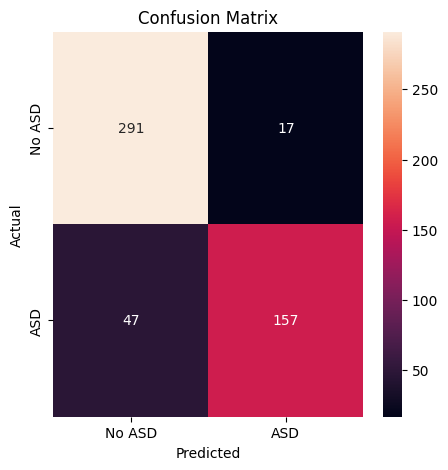

In [23]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=["No ASD", "ASD"],
            yticklabels=["No ASD", "ASD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

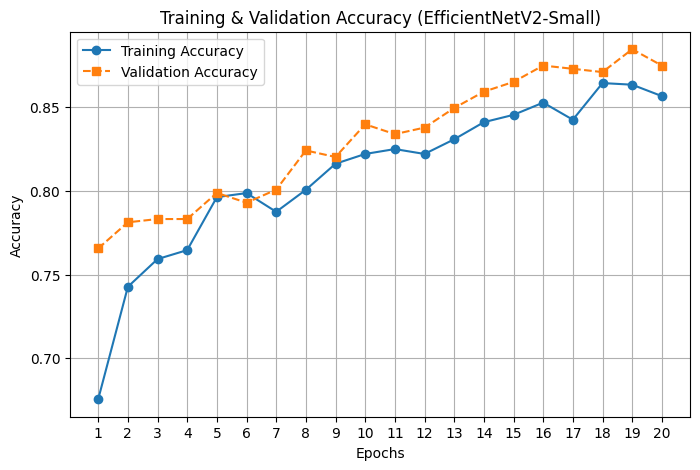

In [24]:
epochs_range = range(1, len(history.history['accuracy']) + 1)

# Accuracy
plt.figure(figsize=(8,5))
plt.plot(epochs_range, history.history['accuracy'], marker='o', linestyle='-')
plt.plot(epochs_range, history.history['val_accuracy'], marker='s', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy (EfficientNetV2-Small)')
plt.xticks(epochs_range)
plt.grid(True)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.show()

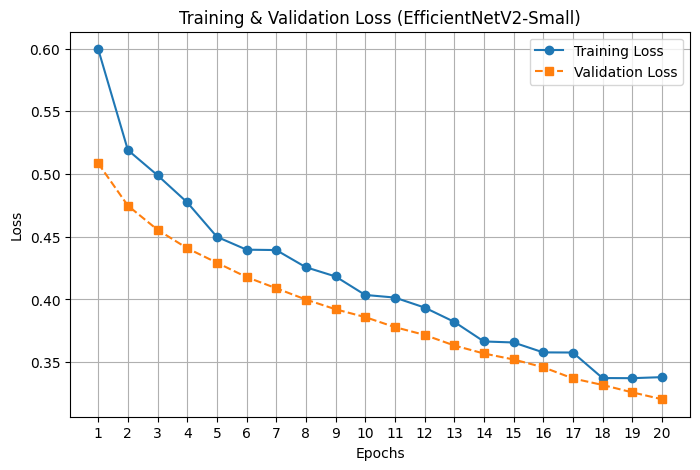

In [25]:

# Loss
plt.figure(figsize=(8,5))
plt.plot(epochs_range, history.history['loss'], marker='o', linestyle='-')
plt.plot(epochs_range, history.history['val_loss'], marker='s', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss (EfficientNetV2-Small)')
plt.xticks(epochs_range)
plt.grid(True)
plt.legend(['Training Loss','Validation Loss'])
plt.show()